# Digital cut-up (pt. 2)
by anna lin

## Phrases from signs

In [ ]:
# word list from the digital cut-up, pt. 1, ** CLEANED**
words = [
    "美",
    "抗衰除皺",
    "永久脱司",
    "脫痣瘦身",
    "212-608-0907",
    "212-964-3510",
    "華",
    "茶",
    "NO PARKING",
    "DON'T EVEN",
    "THINK OF",
    "BLOCKING DRIVEWAY",
    "EAGLE TRAIL PANORAMA",
    "TERRACE",
    "1/4 MILE",
    "BIG BEAR LAKE",
    "Highway 18",
    "→ Ski Resorts",
    "Visitor Center",
    "MINOR FIGURES",
    "BARISTA OAT",
    "Artisanal",
    "wash fold",
    "DIVE CARE",
    "SUPPLY",
    "MONDAY-THURSDAY 7AM-7PM FRIDAY-SUNDAY 7AM-7PM",
    "MONDAY-THUR SAT FR 7AM-7PM",
    "ON RED",
    "CARWASH",
    "ASTRO DINER COFFEE SHOP",
    "OPEN 24 HOURS",
    "ASTRO FAMILY RESTAURANT",
    "CARHOP SERVICE",
    "323 663 9241",
    "SPEED",
    "LIMIT",
    "35",
    "Roth Line",
    "Bitburger Red I",
    "2366",
    "No Lion",
    "früh MAIN ENTRANCE",
    "Glendale BI",
    "DO NOT",
    "ENTER",
    "WRONG WAY",
    "ONE WAY"
]

In [31]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Hiragino Sans GB', 'sans-serif'] #Show Chinese label
plt.rcParams['axes.unicode_minus']=False   #These two lines need to be set manually
pd.options.display.max_rows = 50
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 4)

In [63]:
# order -> the order of the sign in which it was found in (0-10 # photos)
# sanity -> how much sense it makes by itself (0-10)
#          (singular words were ranked lower sanity, and the more sense it makes on a sign by itself, the higher the ranking)
signage = [
    {"content": "美", "order": 0, "sanity": 7},
    {"content": "抗衰除皺", "order": 0, "sanity": 9},
    {"content": "永久脱司", "order": 0, "sanity": 9},
    {"content": "脫痣瘦身", "order": 0, "sanity": 9},
    {"content": "212-608-0907", "order": 0, "sanity": 0},
    {"content": "212-964-3510", "order": 0, "sanity": 0},
    {"content": "華", "order": 0, "sanity": 7},
    {"content": "茶", "order": 0, "sanity": 7},
    {"content": "NO PARKING", "order": 1, "sanity": 10},
    {"content": "DON'T EVEN", "order": 1, "sanity": 9},
    {"content": "THINK OF", "order": 1, "sanity": 9},
    {"content": "BLOCKING DRIVEWAY", "order": 1, "sanity": 9},
    {"content": "EAGLE TRAIL PANORAMA", "order": 2, "sanity": 10},
    {"content": "TERRACE", "order": 2, "sanity": 7},
    {"content": "1/4 MILE", "order": 2, "sanity": 5},
    {"content": "BIG BEAR LAKE", "order": 2, "sanity": 9},
    {"content": "Highway 18", "order": 2, "sanity": 8},
    {"content": "→ Ski Resorts", "order": 2, "sanity": 10},
    {"content": "Visitor Center", "order": 2, "sanity": 9},
    {"content": "MINOR FIGURES", "order": 3, "sanity": 9},
    {"content": "BARISTA OAT", "order": 3, "sanity": 6},
    {"content": "Artisanal", "order": 4, "sanity": 3},
    {"content": "wash fold", "order": 5, "sanity": 3},
    {"content": "DIVE CARE", "order": 5, "sanity": 2},
    {"content": "SUPPLY", "order": 5, "sanity": 7},
    {"content": "MONDAY-THURSDAY 7AM-7PM FRIDAY-SUNDAY 7AM-7PM", "order": 5, "sanity": 5},
    {"content": "MONDAY-THUR SAT FR 7AM-7PM", "order": 5, "sanity": 5},
    {"content": "ON RED", "order": 6, "sanity": 6},
    {"content": "CARWASH", "order": 6, "sanity": 9},
    {"content": "ASTRO DINER COFFEE SHOP", "order": 6, "sanity": 10},
    {"content": "OPEN 24 HOURS", "order": 6, "sanity": 10},
    {"content": "ASTRO FAMILY RESTAURANT", "order": 6, "sanity": 8},
    {"content": "CARHOP SERVICE", "order": 6, "sanity": 9},
    {"content": "323 663 9241", "order": 6, "sanity": 0},
    {"content": "SPEED", "order": 7, "sanity": 3},
    {"content": "LIMIT", "order": 7, "sanity": 4},
    {"content": "35", "order": 7, "sanity": 0},
    {"content": "Roth Line", "order": 8, "sanity": 2},
    {"content": "Bitburger Red I", "order": 8, "sanity": 2},
    {"content": "2366", "order": 8, "sanity": 0},
    {"content": "No Lion", "order": 9, "sanity": 5},
    {"content": "früh MAIN ENTRANCE", "order": 9, "sanity": 2},
    {"content": "Glendale BI", "order": 9, "sanity": 8},
    {"content": "DO NOT", "order": 10, "sanity": 6},
    {"content": "ENTER", "order": 10, "sanity": 10},
    {"content": "WRONG WAY", "order": 10, "sanity": 10},
    {"content": "ONE WAY", "order": 10, "sanity": 10}
]
signage_lookup = {item['content']: (item['order'], item['sanity']) for item in signage}

In [17]:
pd.DataFrame(signage, columns=['content', 'order', 'sanity'])

,content,order,sanity
0,美,0,7
1,抗衰除皺,0,9
2,永久脱司,0,9
3,脫痣瘦身,0,9
4,212-608-0907,0,0
5,212-964-3510,0,0
6,華,0,7
7,茶,0,7
8,NO PARKING,1,10
9,DON'T EVEN,1,9


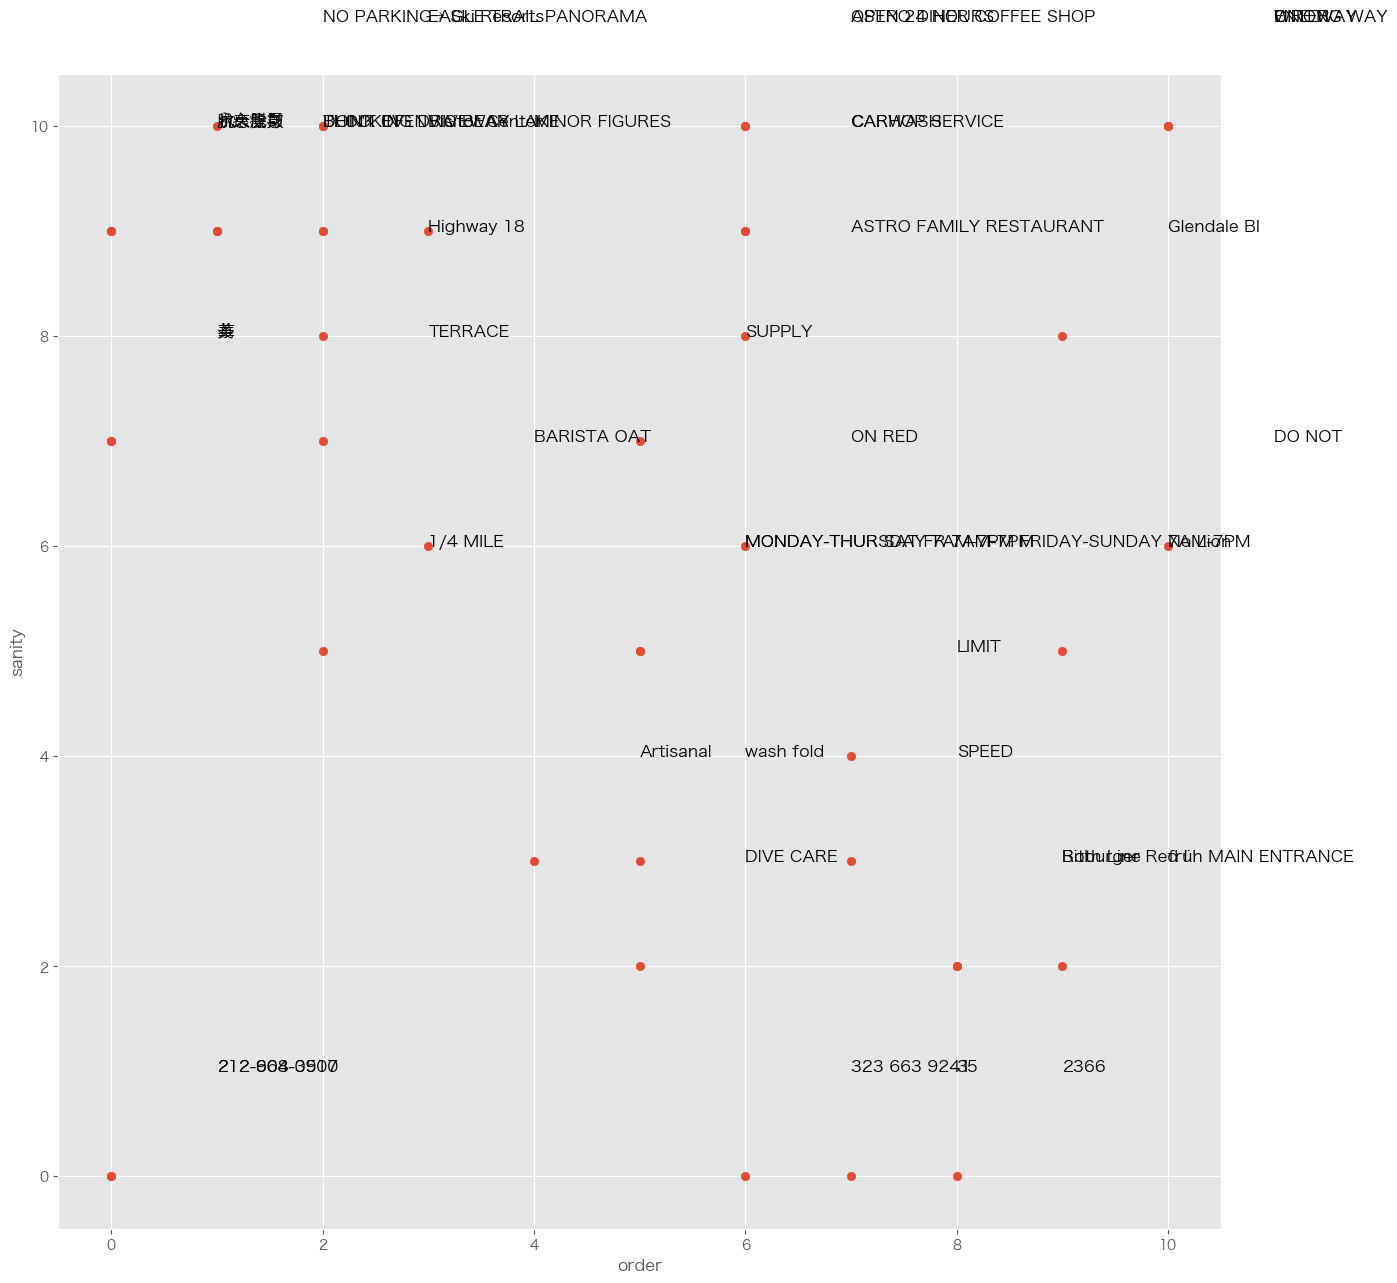

In [34]:
pd.DataFrame(signage, columns=['content', 'order', 'sanity'])
plt.figure(figsize=(15, 15))
plt.scatter([item[0] for item in signage_lookup.values()],
            [item[1] for item in signage_lookup.values()])
plt.xlabel('order')
plt.ylabel('sanity')
for label, (order, sanity) in signage_lookup.items():
    plt.text(order+1, sanity+1, label, fontsize=12)
plt.show()

In [51]:
import math
def distance2d(a, b):
    return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)
distance2d(signage_lookup['LIMIT'], signage_lookup['35'])

4.0

In [36]:
import sys
!{sys.executable} -m pip install simpleneighbors

In [37]:
import sys
!{sys.executable} -m pip install annoy==1.16.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.3/644.3 kB 4.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.16.3-cp39-cp39-macosx_10_9_x86_64.whl size=59872 sha256=0e7591531b5dce3ced2abf19427ec19cfc7634488e40aa6497067bacf32345e6
  Stored in directory: /Users/annaaa/Library/Caches/pip/wheels/1d/f8/4c/58d5c90b6e1af687092c8508b7d609a8af3ba1786c161c588a
Successfully built annoy


In [38]:
import sys
!conda install -y --prefix {sys.prefix} -c conda-forge python-annoy 

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/annaaa/opt/anaconda3

  added / updated specs:
    - python-annoy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-23.1.0               |   py39h6e9494a_0         908 KB  conda-forge
    python-annoy-1.17.1        |   py39h7a8716b_0          66 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    ruamel.yaml-0.17.21        |   py39ha30fb19_3         183 KB  conda-forge
    ruamel.yaml.clib-0.2.7     |   py39ha30fb19_1         118 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.2 MB

The fo

In [40]:
from simpleneighbors import SimpleNeighbors

In [80]:
signagevec = {}
for item in signage:
    # convert signage to word vector with content as hash index and array [x,y] -> x for order, y for sanity
    signagevec[item['content']] = [item['order'], item['sanity']]

In [82]:
signagevec_lookup = SimpleNeighbors(2, 'euclidean')
for item, vec in signagevec.items():
    signagevec_lookup.add_one(item, vec)
signagevec_lookup.build()

In [83]:
signagevec_lookup.nearest(signagevec['DO NOT'])

['DO NOT',
 'No Lion',
 'Glendale BI',
 'LIMIT',
 'ON RED',
 'ENTER',
 'WRONG WAY',
 'ONE WAY',
 'früh MAIN ENTRANCE',
 'SPEED',
 'ASTRO FAMILY RESTAURANT',
 'Roth Line']

Since i have both signage as an array of object and signagevec as a word vector dictionary, i will use both to re-create the signs using the order of the signs (if they came from the same sign) and replace each word with the nearest neighboring word.

In [92]:
# original signage
current_sign = 0
for w in signage:
    # if from the same sign
    if w['order'] == current_sign:
        print(w['content'])
    # otherwise move on to the next sign
    else:
        print('\n')
        print(w['content'], end='\n')
        current_sign = w['order']

美
抗衰除皺
永久脱司
脫痣瘦身
212-608-0907
212-964-3510
華
茶


NO PARKING
DON'T EVEN
THINK OF
BLOCKING DRIVEWAY


EAGLE TRAIL PANORAMA
TERRACE
1/4 MILE
BIG BEAR LAKE
Highway 18
→ Ski Resorts
Visitor Center


MINOR FIGURES
BARISTA OAT


Artisanal


wash fold
DIVE CARE
SUPPLY
MONDAY-THURSDAY 7AM-7PM FRIDAY-SUNDAY 7AM-7PM
MONDAY-THUR SAT FR 7AM-7PM


ON RED
CARWASH
ASTRO DINER COFFEE SHOP
OPEN 24 HOURS
ASTRO FAMILY RESTAURANT
CARHOP SERVICE
323 663 9241


SPEED
LIMIT
35


Roth Line
Bitburger Red I
2366


No Lion
früh MAIN ENTRANCE
Glendale BI


DO NOT
ENTER
WRONG WAY
ONE WAY


To make it make a little more sense, i decided to add arbritrary phrases i thought up, to preface each line of signage.

In [125]:
# mixed-up signage using simpleneighbors
import random

# phrases i thought up
phrases = [
    'She went to the forest but saw a sign saying: ',
    'On the streets they noticed the sign:',
    'He whispered:',
    'She followed:',
    'They obeyed:',
    'Around the corner, she saw:',
    'She looked up, and there it was:',
    'Next to the parking lot:',
    'By the ocean, it said:',
    'We watched as the tourists followed:',
    '"Just give me a sign", she yelled, and there it was:',
]

# first make the poem
current_sign = 0
poem = []
for w in signage:
    vec = signagevec[w['content']]
    neighbors = signagevec_lookup.nearest(vec)
    poem.append(random.choice(neighbors))
    # if not from the same sign, move on to the next sign
    if w['order'] != current_sign:
        current_sign = w['order']
        
# then print each line of the poem out, attached to the phrases based on a random sample
# generating a (somewhat) unique poem of differing lengths each time
line = 0
for p in random.sample(phrases, random.choice([7, len(phrases)-1])):
    print(p)
    print(poem[line])
    line+=1
    if random.choice([0,1]) == 0:
        print('\n')

"Just give me a sign", she yelled, and there it was:
Highway 18


She followed:
華


Around the corner, she saw:
抗衰除皺


On the streets they noticed the sign:
DON'T EVEN


She looked up, and there it was:
212-608-0907
She went to the forest but saw a sign saying: 
212-608-0907
By the ocean, it said:
美
Next to the parking lot:
永久脱司
They obeyed:
BIG BEAR LAKE
He whispered:
永久脱司


